## First test to the simplegrad library

In [1]:
from simplegrad import Tensor
x= Tensor(2.0, label="x")
x

Tensor(data=2.0, grad=0.0, op=, label=x)

In [1]:
from simplegrad import Tensor
# --------------------------
# Tensor operations
# --------------------------
a = Tensor([[1, 2, 3]], requires_grad=True)
b = Tensor([[2, 1, 0]], requires_grad=True)
c = a + b
d = a * b
e = d.sum()

print("c:", c)
print("d:", d)
print("e:", e)

# Backward pass
e.backward()
print("grad a:", a.grad)
print("grad b:", b.grad)

c: Tensor(data=[[3. 3. 3.]], grad=[[0. 0. 0.]], op=+, label=)
d: Tensor(data=[[2. 2. 0.]], grad=[[0. 0. 0.]], op=*, label=)
e: Tensor(data=4.0, grad=0.0, op=sum, label=)
grad a: [[2. 1. 0.]]
grad b: [[1. 2. 3.]]


In [2]:
x= Tensor.arange(1,11)
x

Tensor(data=[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], grad=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], op=, label=)

In [3]:
x = Tensor.eye(3)
x

Tensor(data=[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], grad=[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], op=, label=)

In [7]:
x = Tensor.ones((2,3))
x

Tensor(data=[[1. 1. 1.]
 [1. 1. 1.]], grad=[[0. 0. 0.]
 [0. 0. 0.]], op=, label=)

In [5]:
x = Tensor.zeros((2,3))
x

Tensor(data=[[0. 0. 0.]
 [0. 0. 0.]], grad=[[0. 0. 0.]
 [0. 0. 0.]], op=, label=)

## Building Neural Network with simplegrad

In [1]:
from simplegrad import Tensor, SGD ,MSELoss,Linear

In [2]:
x = Tensor.randn((2,3))
print(x)
l = Linear(3,2,bias=False)
l(x)

Tensor(data=[[-0.97745243  0.85461336 -0.63859969]
 [-1.1782452  -0.71447026 -2.05113263]], grad=[[0. 0. 0.]
 [0. 0. 0.]], op=, label=)


Tensor(data=[[-0.23799649 -1.52733019]
 [ 1.42753751 -1.50928749]], grad=[[0. 0.]
 [0. 0.]], op=matmul, label=)

In [3]:
l.parameters()

[Tensor(data=[[-0.0452746   1.22361909]
  [-0.65928899 -0.2880678 ]
  [-0.44031797  0.13328248]], grad=[[0. 0.]
  [0. 0.]
  [0. 0.]], op=, label=),
 None]

In [216]:
class SmallNetwork():
    def __init__(self,in_features, out_features):
        self.linear1 = Linear(in_features, 10,bias=True)
        self.linear2 = Linear(10,out_features,bias=True)
        
    def forward(self, x):
        x = self.linear1(x)
        x = x.tanh()
        x = self.linear2(x)
        return x
    
    def __call__(self, x):
        return self.forward(x)
    def parameters(self):
        return self.linear1.parameters() 

In [219]:
x = Tensor.randn((1,1))
nn   = SmallNetwork(1,1)
criterion = MSELoss()
optimizer = SGD(nn.parameters(),lr=0.05)
w =  Tensor.randn((1,1))

target = w * x

print("x: ",x," w: ",w," target: ",target)

for i in range(100):
    pred = nn(x)
    loss = criterion(pred,target)
    loss.backward()
    print("loss: ",f"{loss.data}","weights",f"{nn.parameters()[0].data.tolist()[0][0]:3f}","bias:",f"{nn.parameters()[1].data.tolist()[0]:3f}","grad",f"{nn.parameters()[0].grad.tolist()[0][0]:3f}")
    optimizer.step()
    optimizer.zero_grad()

final_pred = nn(x)
print('')
print("model final prediction: ",final_pred.data[0][0], "true value: ",target.data[0][0] ,"diff: ",(final_pred.data-target.data).tolist()[0][0])


x:  Tensor(data=[[-0.36124108]], grad=[[0.]], op=, label=)  w:  Tensor(data=[[-0.16044516]], grad=[[0.]], op=, label=)  target:  Tensor(data=[[0.05795938]], grad=[[0.]], op=*, label=)
loss:  2.0841805256938173 weights -0.285445 bias: 1.519864 grad 0.008332
loss:  1.2491253777926568 weights -0.285861 bias: 1.521018 grad 0.006435
loss:  0.7277880447015742 weights -0.286183 bias: 1.521908 grad 0.004903
loss:  0.41735833710529086 weights -0.286428 bias: 1.522587 grad 0.003708
loss:  0.23664860773225677 weights -0.286613 bias: 1.523100 grad 0.002789
loss:  0.1329815134018798 weights -0.286753 bias: 1.523486 grad 0.002089
loss:  0.07419379503156542 weights -0.286857 bias: 1.523775 grad 0.001559
loss:  0.041165098411494135 weights -0.286935 bias: 1.523991 grad 0.001161
loss:  0.02274344431713293 weights -0.286993 bias: 1.524152 grad 0.000863
loss:  0.012525888807053059 weights -0.287036 bias: 1.524271 grad 0.000640
loss:  0.00688237911886294 weights -0.287068 bias: 1.524360 grad 0.000474
loss

In [6]:
loss

Tensor(data=6.55633668521946e-07, grad=1.0, op=mean, label=)

## Training MNIST Model with simplegrad

In [1]:
from simplegrad import Tensor, SGD ,MSELoss,Linear,DataLoader,CrossEntropyLoss
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import random
import numpy as np

c:\Users\pc\miniconda3\envs\quant\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\oddrationale\mnist-in-csv\versions\2


In [3]:
import pandas as pd

train = pd.read_csv(f"{path}/mnist_train.csv")
test = pd.read_csv(f"{path}/mnist_test.csv")

In [4]:
# spliting images and labels
images = train.values[:,1:]
labels = train.values[:,0]

label:  5


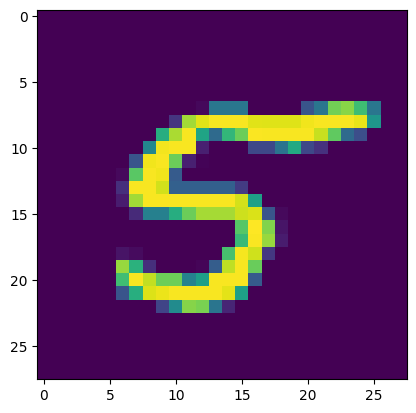

In [49]:
index = random.randint(0,images.shape[0])
image = images[index]
label = labels[index]
print('label: ',label)
image = image.reshape((28,28))
plt.imshow(image)

In [5]:
class MNISTModel():
    def __init__(self,in_features,hidden_features, out_features):
        self.linear1 = Linear(in_features, hidden_features,bias=True)
        self.linear2 = Linear(hidden_features, out_features,bias=True)
    def __call__(self, x):
        x = self.linear1(x)
        x = x.relu()
        x = self.linear2(x)
        return  x

    def parameters(self):
        return self.linear1.parameters() + self.linear2.parameters()
        

In [7]:
# model = MNISTModel(784,100,10)
# image =  images[0]
# image = np.expand_dims(image, axis=0)
# image  = Tensor(image)
# model(image)

label 3


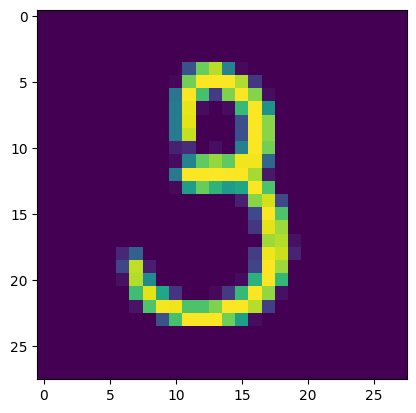

In [ ]:
# using dataloader to load data in batches
traing_data = DataLoader(images,labels)
batch = traing_data(5)
image = batch['data'][0].reshape((28,28))
label = batch['label'][0]
print('label',label)
plt.imshow(image)

In [13]:
model = MNISTModel(784,100,10)
batch = traing_data(5)
input_images = Tensor(batch['data']/ 255.0)
labels = Tensor.one_hotencoding(batch['label'],  10)

In [14]:
criterion  = MSELoss()
optimizer = SGD(model.parameters(),lr=0.001)


for i in range(10000):
    
    batch = traing_data(20)
    input_images = Tensor(batch['data']/ 255.0)
    labels = Tensor.one_hotencoding(batch['label'],  10)

    predictions = model(input_images)
    predictions = predictions.softmax()
    loss = criterion(predictions,labels)
    loss.backward()
    # print("linear1.w.grad sum:", np.sum(model.linear1.w.grad))
    # print("linear2.w.grad sum:", np.sum(model.linear2.w.grad))
    print('loss: ',f"{loss.item():.5f}")
    optimizer.step()
    optimizer.zero_grad()

loss:  0.08976
loss:  0.09186
loss:  0.09029
loss:  0.09000
loss:  0.08914
loss:  0.09175
loss:  0.09049
loss:  0.08971
loss:  0.08871
loss:  0.09032
loss:  0.09065
loss:  0.08928
loss:  0.09053
loss:  0.08813
loss:  0.09020
loss:  0.09005
loss:  0.08884
loss:  0.08918
loss:  0.09109
loss:  0.08944
loss:  0.09061
loss:  0.08813
loss:  0.09013
loss:  0.08974
loss:  0.08952
loss:  0.09045
loss:  0.09059
loss:  0.09064
loss:  0.09097
loss:  0.08957
loss:  0.08863
loss:  0.09092
loss:  0.08946
loss:  0.08850
loss:  0.08930
loss:  0.08919
loss:  0.08962
loss:  0.09069
loss:  0.08969
loss:  0.08970
loss:  0.09060
loss:  0.08838
loss:  0.09075
loss:  0.09030
loss:  0.09023
loss:  0.08925
loss:  0.09107
loss:  0.08983
loss:  0.09098
loss:  0.08919
loss:  0.09022
loss:  0.09137
loss:  0.08930
loss:  0.09003
loss:  0.08737
loss:  0.09079
loss:  0.09103
loss:  0.09028
loss:  0.09010
loss:  0.08852
loss:  0.09058
loss:  0.09112
loss:  0.08899
loss:  0.08977
loss:  0.08921
loss:  0.08930
loss:  0.0

label 0
labels [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predictions:  [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]  label:  0  predicted class:  0  probability:  100.00 %


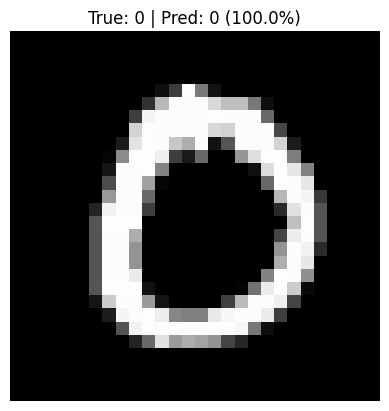

label 6
labels [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predictions:  [2.23245679e-264 8.12582628e-202 1.30978302e-125 1.52456232e-190
 2.01297161e-225 1.04592959e-217 1.00000000e+002 4.10073495e-233
 1.17131413e-140 8.41485951e-196]  label:  6  predicted class:  6  probability:  100.00 %


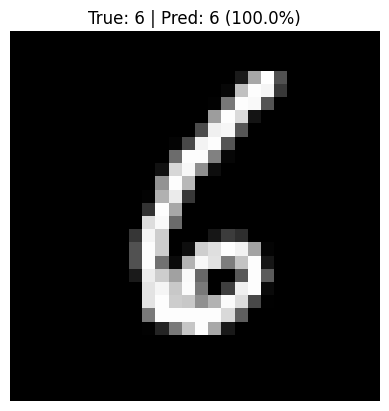

label 1
labels [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predictions:  [0.00000000e+000 1.00000000e+002 7.90943555e-158 3.82313891e-236
 8.68068399e-317 1.88423136e-292 2.38521838e-286 2.49342604e-283
 5.27437156e-133 0.00000000e+000]  label:  1  predicted class:  1  probability:  100.00 %


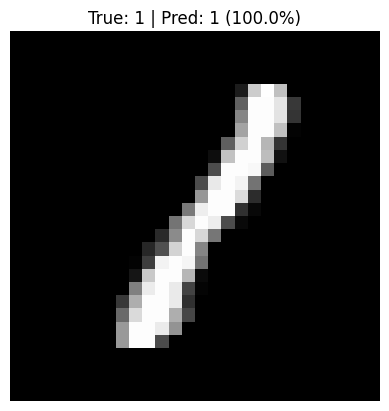

label 6
labels [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predictions:  [0.00000000e+000 1.14150542e-126 3.58503760e-122 1.34064136e-233
 2.01398274e-237 1.00192378e-287 1.00000000e+002 0.00000000e+000
 7.44727773e-186 9.35159510e-225]  label:  6  predicted class:  6  probability:  100.00 %


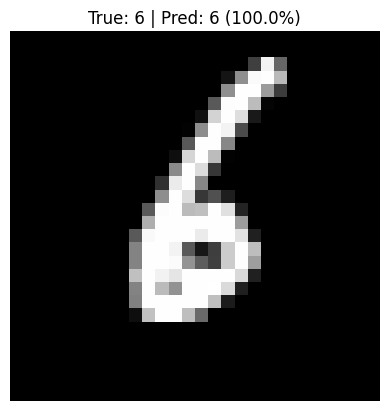

label 3
labels [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
predictions:  [1.05004928e-175 1.96503176e-306 3.09250745e-219 1.00000000e+002
 6.28281383e-278 1.00956432e-199 1.10117279e-295 2.31046359e-252
 5.19389055e-062 2.55987848e-143]  label:  3  predicted class:  3  probability:  100.00 %


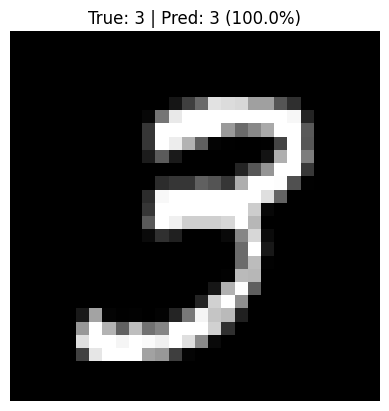

In [16]:
# batch = traing_data(5)
index=1
batch = traing_data(5)
input_images = Tensor(batch['data']/ 255.0)
labels = Tensor.one_hotencoding(batch['label'],  10)
for i in range(batch['data'].shape[0]):
    test_image = batch['data'][i]
    resized_img = test_image.reshape((28,28))
    label = batch['label'][i]
    print('label',label)
    print('labels',labels.data[i])

    prediction  =  model(Tensor(np.expand_dims(test_image, axis=0)))
    prediction = prediction.softmax()*100
    prediction = prediction.data
    prediction= prediction.squeeze()
    print('predictions: ',prediction," label: ",label,' predicted class: ',np.array(prediction).argmax(),' probability: ',f"{np.array(prediction).max():.2f}","%")

    plt.imshow(resized_img, cmap="gray")
    plt.title(f"True: {label} | Pred: {np.array(prediction).argmax()} ({np.array(prediction).max():.1f}%)")
    plt.axis("off")
    plt.show()